<a href="https://colab.research.google.com/github/Alex-Jung-HB/0718_python_YOLO12/blob/main/0718_python_YOLO12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YOLO12 installation and example code to detect objects in images

🎯 YOLO12 Object Detector
📁 Click to select an image file:


Saving KakaoTalk_20250716_202907893_07.jpg to KakaoTalk_20250716_202907893_07 (3).jpg
✅ Uploaded: KakaoTalk_20250716_202907893_07 (3).jpg
🔄 Loading YOLO12...
🔍 Processing with IoU=0.2...

📊 DETECTION RESULTS:
-------------------------
🎯 Found 12 objects:
  1. car (85.8%)
  2. car (83.8%)
  3. car (73.6%)
  4. traffic light (60.5%)
  5. car (46.0%)
  6. traffic light (34.6%)
  7. car (22.4%)
  8. traffic light (17.3%)
  9. car (11.1%)
  10. car (10.1%)
  11. traffic light (8.5%)
  12. car (5.0%)


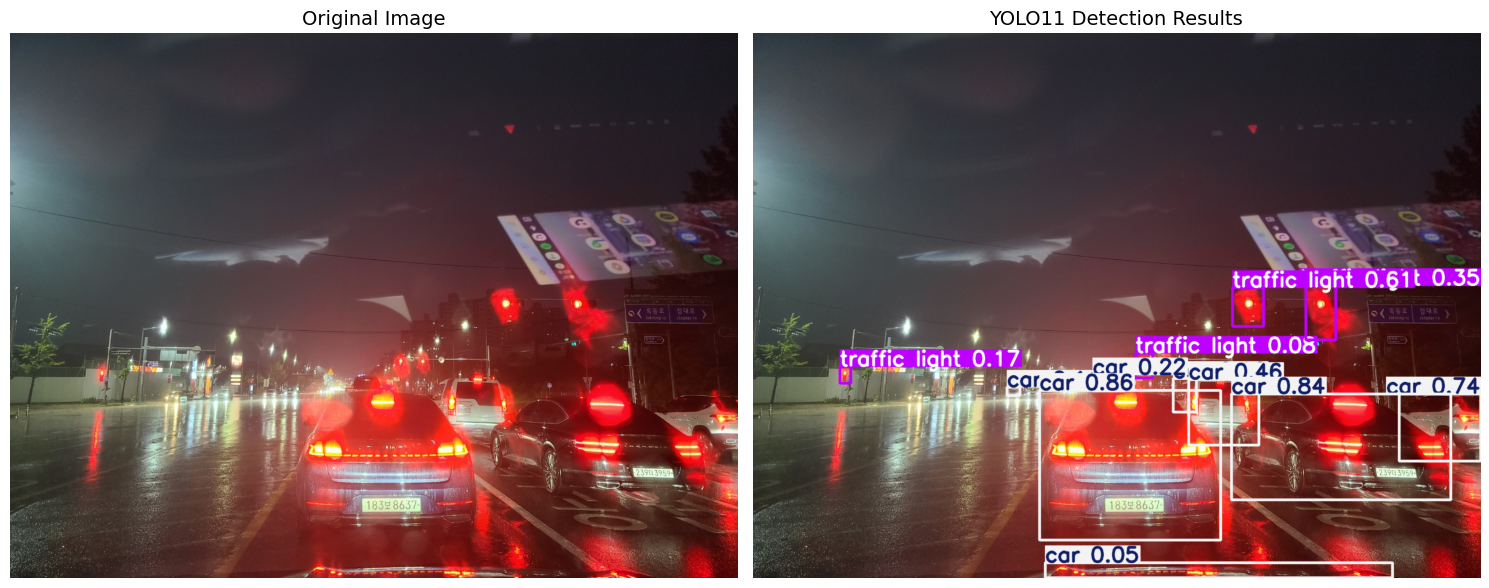


💾 Result saved as: detected_KakaoTalk_20250716_202907893_07 (3).jpg


In [6]:
#!/usr/bin/env python3
"""
Simple YOLO12 Object Detector for Google Colab
- File upload button
- Direct image display in notebook
- Compact and efficient
"""

import os
import subprocess
import sys
from pathlib import Path

def install_packages():
    """Install required packages"""
    packages = ['ultralytics', 'opencv-python']
    for package in packages:
        try:
            if package == 'ultralytics':
                from ultralytics import YOLO
            elif package == 'opencv-python':
                import cv2
        except ImportError:
            print(f"📦 Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package, "-q"])

def upload_and_detect():
    """Upload file and run YOLO detection"""
    try:
        # Import required modules
        from google.colab import files
        from IPython.display import Image, display
        import matplotlib.pyplot as plt
        import cv2
        from ultralytics import YOLO

        print("🎯 YOLO12 Object Detector")
        print("=" * 30)

        # File upload
        print("📁 Click to select an image file:")
        uploaded = files.upload()

        if not uploaded:
            print("❌ No file selected")
            return

        # Get uploaded file
        filename = list(uploaded.keys())[0]
        print(f"✅ Uploaded: {filename}")

        # Load YOLO model
        print("🔄 Loading YOLO12...")
        model = YOLO("yolo12m.pt")    # Replacement of YOLO11n with YOLO12s(small model). * YOLO12m(medium model)

        # Run detection WITH IoU CONTROL
        print("🔍 Processing with IoU=0.2...")
        results = model.predict(
            source=filename,
            conf=0.05,      # Confidence threshold, 0.25 --> 0.05 for small traffic light detection
            iou=0.2,        # IoU threshold - EDIT THIS VALUE
            verbose=False,
            save=False
        )
        result = results[0]

        # Get annotated image
        annotated_img = result.plot()

        # Save result
        output_path = f"detected_{filename}"
        cv2.imwrite(output_path, annotated_img)

        # Display results
        print("\n📊 DETECTION RESULTS:")
        print("-" * 25)

        if result.boxes is not None and len(result.boxes) > 0:
            print(f"🎯 Found {len(result.boxes)} objects:")
            for i, box in enumerate(result.boxes, 1):
                class_id = int(box.cls[0])
                confidence = float(box.conf[0])
                class_name = model.names[class_id]
                print(f"  {i}. {class_name} ({confidence:.1%})")
        else:
            print("❌ No objects detected")

        # Display original and result images
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Original image
        original_img = cv2.imread(filename)
        original_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        ax1.imshow(original_rgb)
        ax1.set_title("Original Image", fontsize=14)
        ax1.axis('off')

        # Result image
        result_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
        ax2.imshow(result_rgb)
        ax2.set_title("YOLO11 Detection Results", fontsize=14)
        ax2.axis('off')

        plt.tight_layout()
        plt.show()

        print(f"\n💾 Result saved as: {output_path}")

    except ImportError:
        print("❌ This code is designed for Google Colab")
        print("💡 Use: from google.colab import files")

    except Exception as e:
        print(f"❌ Error: {e}")

def run_detector():
    """Main function to run the detector"""
    # Install packages
    install_packages()

    # Run detection
    upload_and_detect()

# Run the detector
if __name__ == "__main__":
    run_detector()

Video detection using YOLO12

In [7]:
#!/usr/bin/env python3
"""
Simple YOLO12 Video Object Detector for Google Colab
- Upload video files (mp4, avi, mov, etc.)
- Process each frame with object detection
- Return processed video with bounding boxes
- Simple and easy to understand
"""

import os   # os(Operating System): Main software that manages and controls your computer's hardware and software resources
import subprocess   # subprocess: Python module for running external programs and system commands from within your Python script.
import sys    # sys: Python module that provides access to system-specific parameters and functions
from pathlib import Path    # pathlib(Path Library): modern Python module for working with file and directory paths.

def install_packages():
    """
    Install required Python packages if they're not already installed
    - ultralytics: For YOLO12 model
    - opencv-python: For video processing
    """
    packages = ['ultralytics', 'opencv-python']   # List of the modeuls to be installed

    for package in packages:
        try:
            # Try to import each package to check if it's installed
            if package == 'ultralytics':
                from ultralytics import YOLO
            elif package == 'opencv-python':
                import cv2
        except ImportError:
            # If package is missing, install it
            print(f"📦 Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package, "-q"])

def upload_and_process_video():
    """
    Main function to upload video file and process it with YOLO12 detection
    Returns the processed video with object detection annotations
    """
    try:
        # Import required modules for Google Colab
        from google.colab import files    # This imports the files module from Google Colab, which handles file upload/download operations between your computer and the Colab environment.
        import cv2
        from ultralytics import YOLO

        print("🎥 YOLO12 Video Object Detector")
        print("=" * 40)

        # Step 1: Upload video file
        print("📁 Click to select a video file (mp4, avi, mov, etc.):")
        uploaded = files.upload()
        """
        files.upload():
        - Opens a file picker dialog in your browser
        - Shows a "Choose Files" button
        - Lets you select one or more files from your computer
        - Uploads selected files to Colab's temporary storage
        * Parentheses () are used to CALL (execute) a function
        """

        # Check if user actually uploaded a file
        if not uploaded:
            print("❌ No file selected")
            return

        # Get the uploaded filename
        input_filename = list(uploaded.keys())[0]   # .keys(): Gets all the dictionary keys(filenames) and returns a dict_keys object(not a regular list), list()[index]: Converts dict_keys object into a regular Python list
        print(f"✅ Uploaded: {input_filename}")

        # Step 2: Load YOLO11 model
        print("🔄 Loading YOLO12 model...")
        model = YOLO("yolo12m.pt")  # Downloads model automatically if needed

        # Step 3: Open input video
        print("📖 Reading video file...")
        cap = cv2.VideoCapture(input_filename)    # cv2.VideoCapture: OpenCV libraryto creates a VideoCapture object to read video files

        # Check if video opened successfully
        if not cap.isOpened():
            print("❌ Error: Could not open video file")
            return

        # Get video properties (needed for output video). cap.get() Does:It reads the video file's metadata for every types of input files
        fps = int(cap.get(cv2.CAP_PROP_FPS))          # Frames per second
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))   # Video width
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) # Video height
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) # Total frames

        print(f"📏 Video info: {width}x{height}, {fps} FPS, {total_frames} frames")

        # Step 4: Setup output video writer
        output_filename = f"detected_{input_filename}"
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')    # Make recipe to creat a video file
        out = cv2.VideoWriter(output_filename, fourcc, fps, (width, height))    # Make a video file with the recipe

        print("🔍 Processing video frames...")

        """
        FOURCC: "Four Character Code" - exactly 4 characters that identify video/audio codecs.
        - fourcc = "HOW" to compress the video (the recipe)
        - VideoWriter = "WHAT" writes the video (the machine)
        """

        # Step 5: Process video frame by frame
        frame_count = 0
        detected_objects = []   # Creates a new, empty list in Python

        while True:
            # Read next frame
            ret, frame = cap.read()
            """
            cap.read(): captur and read, Reads the next frame from the video file.
            ret, frame: Tuple unpacking - splits the result into two separate variables
            ret: Return Status Variable. it's the status that tells us if the operation was successful or not
            """
            # Break loop if no more frames
            if not ret:
                break

            frame_count += 1

            # Show progress every 30 frames (about once per second for 30fps video)
            if frame_count % 30 == 0:
                progress = (frame_count / total_frames) * 100
                print(f"⏳ Progress: {progress:.1f}% ({frame_count}/{total_frames} frames)")

            # Run YOLO detection on current frame
            results = model.predict(    # model.predict:main function that runs YOLO object detection on images or video frames.
                source=frame,
                conf=0.15,      # Confidence threshold (15%)
                iou=0.2,        # IoU threshold for removing duplicate detections
                verbose=False,  # Don't print detection details
                save=False      # Don't save individual frames
            )

            # Get detection results for this frame
            result = results[0]   # The [0] is needed because model.predict() always returns a LIST, even when analyzing just one image

            # Draw bounding boxes and labels on frame
            annotated_frame = result.plot()

            # Collect detection info for summary
            if result.boxes is not None and len(result.boxes) > 0:    # result.boxes is not None: Presence of the detected object, len(result.boxes): number of the boxes
                for box in result.boxes:
                    class_id = int(box.cls[0])    # Each object type has a unique number. box.cls: box class(or classification)
                    class_name = model.names[class_id]
                    if class_name not in detected_objects:
                        detected_objects.append(class_name)   # append(): add item to end of list

            # Write annotated frame to output video
            out.write(annotated_frame)

        # Step 6: Clean up resources. Prparing the  process for next capture(scene)
        cap.release()      # Close input video
        out.release()      # Close output video
        # cv2.destroyAllWindows()  # Close any OpenCV windows

        # Step 7: Show results summary
        print("\n📊 PROCESSING COMPLETE!")
        print("-" * 30)
        print(f"✅ Processed {frame_count} frames")
        print(f"🎯 Detected object types: {', '.join(detected_objects) if detected_objects else 'None'}")
        print(f"💾 Output saved as: {output_filename}")

        # Step 8: Download the processed video
        print("\n📥 Downloading processed video...")
        files.download(output_filename)

        return output_filename

    except ImportError:
        print("❌ This code is designed for Google Colab")
        print("💡 Please run this in Google Colab environment")

    except Exception as e:    # e: variable containing error details, Exception: catches almost all types of errors
        print(f"❌ Error occurred: {e}")
        print("💡 Make sure your video file is valid and not corrupted")

def run_video_detector():
    """
    Main function that orchestrates the entire process:
    1. Install required packages
    2. Upload and process video
    """
    print("🚀 Starting YOLO11 Video Detection System")

    # Install necessary packages first
    install_packages()

    # Run the main video processing
    upload_and_process_video()

# Entry point - runs when script is executed
if __name__ == "__main__":
    run_video_detector()

🚀 Starting YOLO11 Video Detection System
🎥 YOLO12 Video Object Detector
📁 Click to select a video file (mp4, avi, mov, etc.):


Saving KakaoTalk_20250716_203030552.mp4 to KakaoTalk_20250716_203030552.mp4
✅ Uploaded: KakaoTalk_20250716_203030552.mp4
🔄 Loading YOLO12 model...
📖 Reading video file...
📏 Video info: 1600x720, 24 FPS, 1889 frames
🔍 Processing video frames...
⏳ Progress: 1.6% (30/1889 frames)
⏳ Progress: 3.2% (60/1889 frames)
⏳ Progress: 4.8% (90/1889 frames)
⏳ Progress: 6.4% (120/1889 frames)
⏳ Progress: 7.9% (150/1889 frames)
⏳ Progress: 9.5% (180/1889 frames)
⏳ Progress: 11.1% (210/1889 frames)
⏳ Progress: 12.7% (240/1889 frames)
⏳ Progress: 14.3% (270/1889 frames)
⏳ Progress: 15.9% (300/1889 frames)
⏳ Progress: 17.5% (330/1889 frames)
⏳ Progress: 19.1% (360/1889 frames)
⏳ Progress: 20.6% (390/1889 frames)
⏳ Progress: 22.2% (420/1889 frames)
⏳ Progress: 23.8% (450/1889 frames)
⏳ Progress: 25.4% (480/1889 frames)
⏳ Progress: 27.0% (510/1889 frames)
⏳ Progress: 28.6% (540/1889 frames)
⏳ Progress: 30.2% (570/1889 frames)
⏳ Progress: 31.8% (600/1889 frames)
⏳ Progress: 33.4% (630/1889 frames)
⏳ Progres

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Code revision for checking FPS for the video processing by YOLO12